<a href="https://colab.research.google.com/github/MasonRiley/idc6210_capstone/blob/init/RRP_Analytics_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here is the link to RRP Analytics' Video Presentation on Customer Churn:

# 1.  Load all of the necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder


# 2. Load the Datasets

In [ ]:
# Next we Loaded our dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Here we displayed the first few rows(little peek at our datasets)
print(train_data.head())
print(test_data.head())

# Again just gaining more basic information on the nature of our data
print(train_data.info())
print(test_data.describe())


     id  gender  senior_citizen partner dependents  tenure phone_service  \
0  1815    Male               0     Yes        Yes      12           Yes   
1  5947  Female               0      No         No      42           Yes   
2  3882    Male               0     Yes         No      71           Yes   
3  2390    Male               0     Yes        Yes      71           Yes   
4  3677    Male               0      No         No      30           Yes   

  multiple_lines internet_service      online_security  ...  \
0             No               No  No internet service  ...   
1             No              DSL                  Yes  ...   
2            Yes              DSL                  Yes  ...   
3            Yes              DSL                  Yes  ...   
4             No              DSL                  Yes  ...   

     device_protection         tech_support         streaming_tv  \
0  No internet service  No internet service  No internet service   
1                  Yes      

# 3. Data Exploration

id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
label                0
dtype: int64
id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64
                id  senior_citi

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Transformed training data:
     id  senior_citizen  tenure  monthly_charges  label  gender_Male  \
0  1815               0      12            19.70      0          1.0   
1  5947               0      42            73.90      1          0.0   
2  3882               0      71            65.15      0          1.0   
3  2390               0      71            85.45      0          1.0   
4  3677               0      30            70.40      0          1.0   

   partner_Yes  dependents_Yes  phone_service_Yes  \
0          1.0             1.0                1.0   
1          0.0             0.0                1.0   
2          1.0             0.0                1.0   
3          1.0             1.0                1.0   
4          0.0             0.0                1.0   

   multiple_lines_No phone service  ...  total_charges_994.55  \
0                              0.0  ...                   0.0   
1                              0.0  ...                   0.0   
2                         

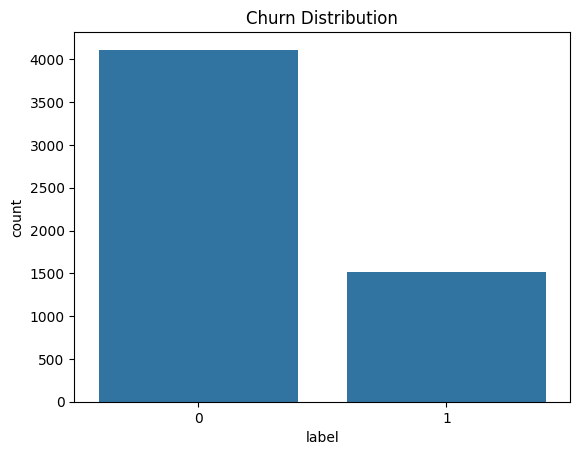

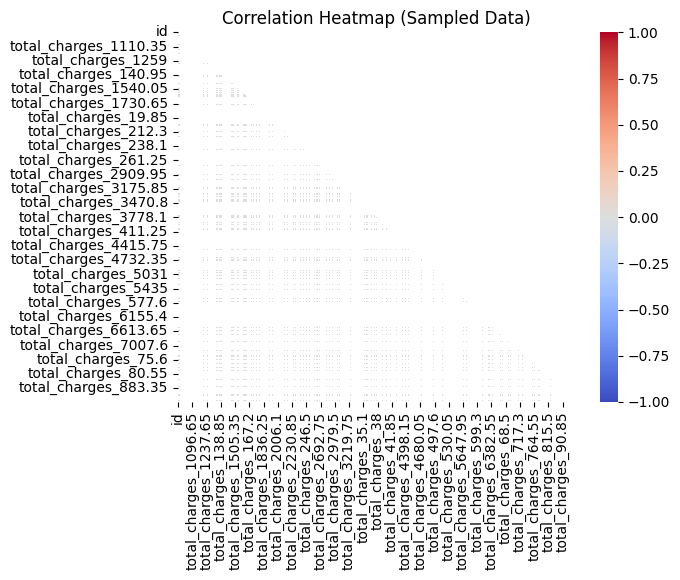

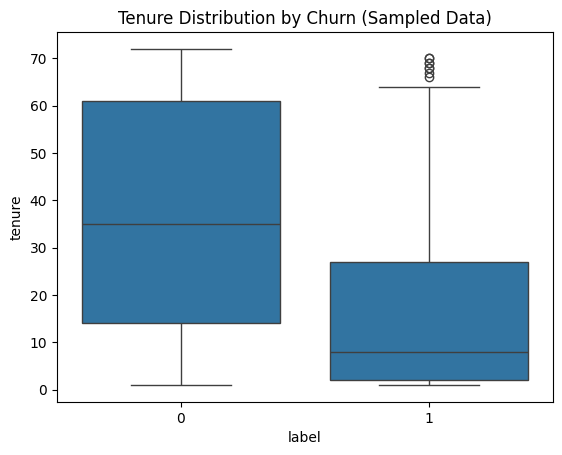

Correlation Matrix:
                            id  senior_citizen    tenure  monthly_charges  \
id                    1.000000        0.014704  0.003617        -0.023486   
senior_citizen        0.014704        1.000000  0.023443         0.225234   
tenure                0.003617        0.023443  1.000000         0.251072   
monthly_charges      -0.023486        0.225234  0.251072         1.000000   
label                 0.013765        0.141966 -0.351885         0.196805   
...                        ...             ...       ...              ...   
total_charges_997.65  0.017427        0.030318 -0.011547         0.013443   
total_charges_997.75  0.020478       -0.005856  0.010160        -0.020086   
total_charges_998.1   0.013632       -0.005856  0.012330        -0.020196   
total_charges_999.45  0.001142       -0.005856 -0.010461         0.004524   
total_charges_999.9  -0.004352       -0.005856 -0.011547         0.013022   

                         label  gender_Male  partner_Ye

In [ ]:
# Here we checked for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Here we wanted to see the distribution of
#our data via summary statistics
print(train_data.describe())
print(test_data.describe())

# Here we identified our nominal features
nominal_features = train_data.select_dtypes(include=['object', 'category']).columns
print(nominal_features)

# Next we One-hot encoded our nominal features in the train data set
one_hot_encoded = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore')
train_encoded = pd.DataFrame(
    one_hot_encoded.fit_transform(train_data[nominal_features]),
    columns=one_hot_encoded.get_feature_names_out(nominal_features),
    index=train_data.index
)

# Next we One-hot encoded our nominal features in the test data set
test_encoded = pd.DataFrame(
    one_hot_encoded.transform(test_data[nominal_features]),
    columns=one_hot_encoded.get_feature_names_out(nominal_features),
    index=test_data.index)

# Next we dropped the original nominal features and
#concatenate the encoded features
train_data = pd.concat([train_data.drop(columns=nominal_features),
                        train_encoded], axis=1)
test_data = pd.concat([test_data.drop(columns=nominal_features), test_encoded],
                      axis=1)

# Here we verified that the data has been transformed correctly
print("Transformed training data:")
print(train_data.head())
print("Transformed testing data:")
print(test_data.head())

# Now we visualize the distribution of our target variable
sns.countplot(x='label', data=train_data)
plt.title("Churn Distribution")
plt.show()

# We selected a sub-set of numerical features(run-time on full set too long)
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data_subset = train_data[numerical_features]

# Reduced feature set or sampled rows
train_data_sampled = train_data_subset.sample(1000, random_state=42)

# Compute and plot the correlation heatmap
corr = train_data_sampled.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=False, cmap='coolwarm', mask=mask)
plt.title("Correlation Heatmap (Sampled Data)")
plt.show()

# Plot a boxplot with sampled data
sns.boxplot(x='label', y='tenure', data=train_data_sampled)
plt.title("Tenure Distribution by Churn (Sampled Data)")
plt.show()

# Here we computed the correlation matrix
corr_matrix = train_data_subset.corr()
print("Correlation Matrix:")
print(corr_matrix)




In [ ]:
print(train_data.columns)

Index(['id', 'senior_citizen', 'tenure', 'monthly_charges', 'label',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service',
       ...
       'total_charges_994.55', 'total_charges_994.8', 'total_charges_995.35',
       'total_charges_996.45', 'total_charges_996.85', 'total_charges_997.65',
       'total_charges_997.75', 'total_charges_998.1', 'total_charges_999.45',
       'total_charges_999.9'],
      dtype='object', length=5321)


# 4. Data Preprocessing

In [ ]:
# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1: Here we define the features (X) and target variable (y)
X = train_data.drop(columns=['label', 'id'])  # Here we dropped the target column 'label' and 'id' column
y = train_data['label']  # Target variable 'label'

# 2: Here we saved the 'id' columns before dropping them for submission
train_ids = train_data['id']  # Preserve 'id' from train_data
test_ids = test_data['id']  # Preserve 'id' from test_data

# 3: Here we dropped 'id' column from the feature set (X) before processing
X_test = test_data.drop(columns=['id'])  # Drop 'id' from test data

# 4: Here we identified the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# 5: Here we  preprocessed pipelines for numerical and categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values
    ('scaler', StandardScaler())  # Standardize numerical features
])

# 6: Here we made transformations into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Apply numerical transformer to numerical columns
        ('cat', categorical_transformer, categorical_cols)  # Apply categorical transformer to categorical columns
    ]
)

# 7: Here we split the dataset into training and test sets (using stratified splitting to preserve label distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8:Finally, we preprocessed the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#Ensure test_ids matches the number of predictions (during deployment stage)








# 5. Model Training

In [ ]:
# Logistic Regression Classifier
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# First, we train the model
lr_pipeline.fit(X_train, y_train)

# Next, we predict and evaluate
y_pred_lr = lr_pipeline.predict(X_test)

# Finally, we evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, average='binary')  # Use 'binary' for binary classification

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression F1-Score:", f1)



Logistic Regression Accuracy: 0.7870452528837621
Logistic Regression F1-Score: 0.5366795366795367


In [ ]:
# Decision Tree Classifier
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Added random_state for reproducibility
])

# First, we train the model
dt_pipeline.fit(X_train, y_train)

# Next, we predict and evaluate
y_pred_dt = dt_pipeline.predict(X_test)

# Finally, we evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='binary')  # Use 'binary' for binary classification

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-Score:", dt_f1)



Decision Tree Accuracy: 0.7772848269742679
Decision Tree F1-Score: 0.5604203152364273


In [ ]:
# Random Forest Classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# First, we train the model
rf_pipeline.fit(X_train, y_train)

# Next, we predict and evaluate
y_pred_rf = rf_pipeline.predict(X_test)

# Finally, we evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='binary')  # Use 'binary' for binary classification

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-Score:", rf_f1)



Random Forest Accuracy: 0.7932564330079858
Random Forest F1-Score: 0.5510597302504817


In [ ]:
# Support Vector Machine (SVM) Classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # Default kernel is 'rbf'
])

# First, we train the model
svm_pipeline.fit(X_train, y_train)

# Next, we predict on the test set
y_pred_svm = svm_pipeline.predict(X_test)

# Finally, we evaluation Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='binary')  # Use 'binary' for binary classification

print("SVM Accuracy:", svm_accuracy)
print("SVM F1-Score:", svm_f1)



SVM Accuracy: 0.5989352262644189
SVM F1-Score: 0.5368852459016393


In [ ]:
# K-Nearest Neighbors (KNN) Classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # Default n_neighbors is 5
])

# First, we train the model
knn_pipeline.fit(X_train, y_train)

# Next, we predict on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Finally, we evaluate Metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='binary')  # Use 'binary' for binary classification

print("KNN Accuracy:", knn_accuracy)
print("KNN F1-Score:", knn_f1)




KNN Accuracy: 0.7302573203194321
KNN F1-Score: 0.01935483870967742


# 6. Hyper Parameter Tuning using Random Forest as an Example

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# First, we defined the hyperparameter grid to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Max depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Next, we apend Random Forest Classifier Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # here we applied the preprocessing steps
    ('classifier', RandomForestClassifier(random_state=42))
])

# Next, we set up the GridSearchCV with 3-fold cross-validation and 'f1_macro' scoring
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)

# Next, we fit the model using grid search
grid_search.fit(X_train, y_train)

# Next, we get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score (Macro):", grid_search.best_score_)

# Finally, use the best model to make predictions and evaluate
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='binary')

print("Random Forest Accuracy after Tuning:", rf_accuracy)
print("Random Forest F1-Score after Tuning:", rf_f1)



Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best F1-Score (Macro): 0.7054417858818892
Random Forest Accuracy after Tuning: 0.7923691215616682
Random Forest F1-Score after Tuning: 0.54296875


# Hyper Parameter Tuning using the Logestic Regression Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Here we defined the hyperparameter grid with conditional constraints for solvers
param_dist = {
    'classifier__penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (more values for better search)
    'classifier__max_iter': [100, 200, 300],  # Max number of iterations for convergence
    'classifier__tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria (balance between speed and accuracy)
    'classifier__class_weight': [None, 'balanced'],  # Adjust class weight if class imbalance exists
}

# For the liblinear solver, we allow only 'l1' and 'l2' penalties
param_dist['classifier__solver'] = ['liblinear']

# For newton-cg and lbfgs solvers, we restrict penalties to 'l2'
param_dist.update({
    'classifier__penalty': ['l2'],  # Only 'l2' for these solvers
    'classifier__solver': ['newton-cg', 'lbfgs'],
})

# Logistic Regression Classifier Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(warm_start=True))  # Logistic Regression Classifier with warm_start
])

# Set up the StratifiedKFold and RandomizedSearchCV with 'f1_macro' scoring
cv = StratifiedKFold(n_splits=3)  # Ensures each fold has a similar distribution of classes
random_search = RandomizedSearchCV(
    lr_pipeline, param_distributions=param_dist, n_iter=30, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42
)

# Here we it the model using randomized search
random_search.fit(X_train, y_train)

# Next, we get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score (Macro):", random_search.best_score_)

# Nextwe, use the best model to make predictions and evaluate
best_lr_model = random_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Finally, we evaluate model performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='macro')  # Use 'macro' for balanced multi-class performance

print("Logistic Regression Accuracy after Tuning:", lr_accuracy)
print("Logistic Regression F1-Score after Tuning:", lr_f1)







Best Parameters: {'classifier__tol': 0.0001, 'classifier__solver': 'newton-cg', 'classifier__penalty': 'l2', 'classifier__max_iter': 300, 'classifier__class_weight': 'balanced', 'classifier__C': 0.001}
Best F1-Score (Macro): 0.7323005984777776
Logistic Regression Accuracy after Tuning: 0.7639751552795031
Logistic Regression F1-Score after Tuning: 0.7034938004921626


# 7. Learning Curve Visualization for Logestic Regression

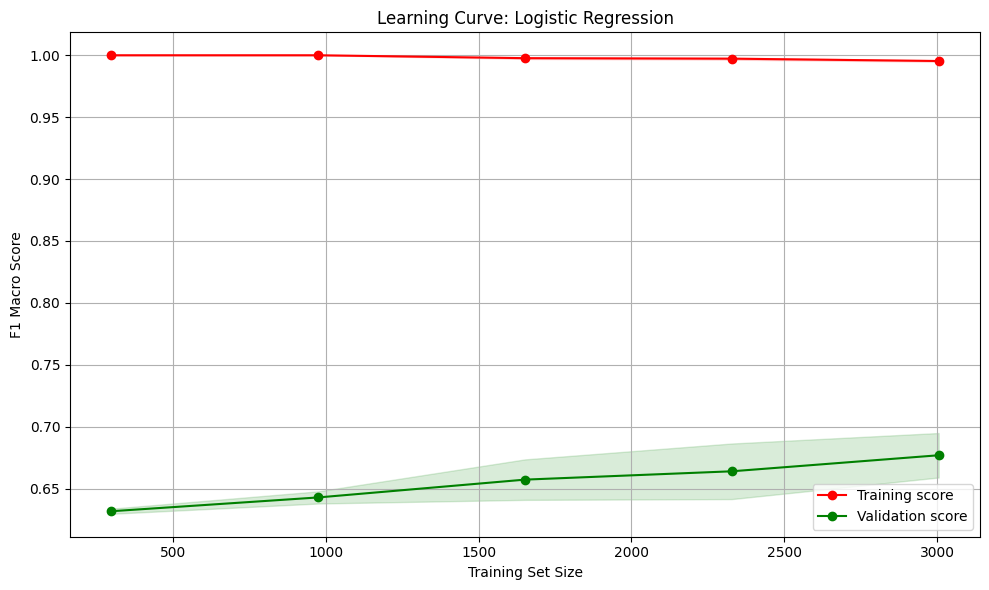

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def plot_learning_curve(estimator, X, y, cv=3, scoring='f1_macro'):
    """
    Plot the learning curve for a given estimator.

    Parameters:
    - estimator: The machine learning pipeline or model.
    - X: Feature matrix (training data).
    - y: Target variable.
    - cv: Number of cross-validation folds (default: 3).
    - scoring: Scoring metric (default: 'f1_macro').
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.15, color="r")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.15, color="g")

    plt.title('Learning Curve: Logistic Regression')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Macro Score')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Logistic Regression pipeline (already defined)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessor is already defined
    ('classifier', LogisticRegression())
])

# Plot learning curve for Logistic Regression pipeline
plot_learning_curve(lr_pipeline, X_train, y_train)





#. 8 Model Deployment

In [ ]:
# Use the saved 'test_ids' from earlier preprocessing (which contains the original IDs)
# Ensure 'test_ids' matches the length of 'y_test_predictions'
churn_labels = ['Yes' if pred == 1 else 'No' for pred in y_test_predictions]

# Ensure the length of test_ids matches y_test_predictions (in case of any mismatch)
test_ids = test_ids[:len(y_test_predictions)]  # Slice test_ids to match length of predictions

# Create a submission file using 'test_ids' that was saved earlier
submission = pd.DataFrame({
    'id': test_ids,  # Using 'test_ids' that was saved earlier
    'label': churn_labels  # Changed column name to 'label'
})

# Save the submission file to CSV
submission.to_csv('submission.csv', index=False)





